# **Titanic - Machine Learning from Disaster**
### **July 2024 - Liam O'Leary**


> "There is no danger that Titanic will sink. The boat is unsinkable and nothing but inconvenience will be suffered by the passengers."<br>
> — Phillip Franklin, White Star Line Vice President

Hi, my name is Liam, and welcome to my first Kaggle competition entry! <br>  My main challenge is to create a clean workflow for data preparation and data analysis. <br> The second challenge is to use clear markdown notation as a best practice for the future. <br> The third challenge is to select and finetuning a machine learning algorithm to answer a data question. <br> My approach is to transform train and test data as much as needed, given the algorithm will be tested against Kaggle rather than the test data set.

## <u>My Workflow</u>

#### 1. Define the question
#### 2. Inspect the training and testing data
#### 3. Data cleaning
#### 3. Data preparation
#### 4. Explore the data
#### 5. Model the problem
#### 6. Report the solution
#### 7. Submit the results

> "Promise me you'll survive. That you won't give up, no matter what happens, no matter how hopeless. Promise me now, Rose, and never let go of that promise." — Jack, Titanic (1997) 
> 
>  "I cannot imagine any condition which would cause a ship to founder. I cannot conceive of any vital disaster happening to this vessel. Modern ship building has gone beyond that." 
> — Captain Smith, Commander of Titanic

## 1. Define the question
This goal is to create a ML algorithm that predicts the survival of passengers on the Titanic. <br>
    The data source is the Kaggle competition page: https://www.kaggle.com/competitions/titanic <br>
    The data source provided two inputs (both .csv files): a training dataset and a test dataset of passenger information.<br>
    The data source also provided a template output file (.csv) called 'my_submission.csv', which contains two columns: Passenger ID numbers and Survival values (1 or 0).<br>
        The ML algorithm will edit and resave 'my_submission.csv'. <br>
    The method is to train an algorithm on parameters in the training dataset to then change Survival values in the 'my_submission.csv' output to align as closely as possible with those in the test dataset ("to predict survival values in the test data").  <br> 
    The 'my submission.csv' output file will then be submitted online to the Kaggle website.  <br>
    The success outcome is a relative measure — the Kaggle website will provide a prediction accuracy in % when submitting the output. 

***

## 2. Inspect the training and testing data

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

#Data Cleaning and Preparation
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import random as rnd
import missingno as msno #null/missing values analysis


#Imputation
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler

#Visualization
import seaborn as sns
sns.set(style="darkgrid")
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline

#Machine Learning - SciKitLearn
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV, cross_val_score



# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
 
print("Python packages and input files have been loaded.")

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv
Python packages and input files have been loaded.


In [2]:
#1. Load all data
train_df = pd.read_csv('/kaggle/input/titanic/train.csv')
train_df.name = "Training dataset"
train_orig = train_df.copy() #original copy of data for later comparison

test_df = pd.read_csv('/kaggle/input/titanic/test.csv')
test_df.name = "Test dataset"
test_orig = test_df.copy() #original copy of data for later comparison


train_df['train_test'] = 1
test_df['train_test'] = 0

complete_df = pd.concat([train_df,test_df])
complete_df.name = "Complete dataset"
complete_orig = complete_df.copy() #original copy of data for later comparison

dfs = [train_df,test_df]

print("Datasets have been defined as pandas dataframes — training, test, and combined! A list has also been made.")
print(("We need combined data for data preparation, including feature engineering of new variables or imputation of missing values."))

Datasets have been defined as pandas dataframes — training, test, and combined! A list has also been made.
We need combined data for data preparation, including feature engineering of new variables or imputation of missing values.


In [3]:
print("2a. Identify variables in training data")
train_df.info()
test_df.info()
complete_df.info()
print(dfs)

2a. Identify variables in training data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  train_test   891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------    

From the above, we can see that:
*     There are 12 features in the training dataset, and 11 features in the test dataset. ***(Initial Question: could we create more relevant features with feature engineering?)***
*     The Survived variable is the target variable, and is only found in the test data. So we will need to rely on Kaggle competition submission to record our algorithm's accuracy.
*     PassengerID is a feature in both datasets, the training dataset contains 891 passengers, and the test dataset contains 418 passengers.  ***(Initial Question: can we check for nulls, duplicates, and mistakes in PassengerID and other data before analysis?)***
*     Age, Fare, and Embarked have missing values in the training dataset.  ***(Initial Question: should we remove or impute data?)***
*     Age & Fare have missing values in test. ***(Initial Question: should we remove or impute data?)***
***


## 3. Data cleaning

My approach is as follows:
1. List variables and consider meaning
2. Check there are no duplicates in the data
3. Check there are no mistakes in the data
4. Check there are no nulls in the data
5. Analyse any trends in any observed duplicates, mistakes, or nulls.
6. Impute or remove any observed duplicates, mistakes, or nulls.
7. Proceed to feature engineering or analysis based on observations.

In [4]:
print(train_df.columns)
train_df.dtypes

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'train_test'],
      dtype='object')


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
train_test       int64
dtype: object

In [5]:
featurestable = pd.DataFrame({
    'Feature': ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
    'Definition': ['Passenger ID number', 'Survival status: 1 or 0', 'Passenger Class: 1, 2, or 3', 'Name: Name', 'Sex: M/F', 'Age in years', "# passenger's siblings and spouse", "# passenger's parents and children", "Ticket number", "Cost of fare", "Number of cabin", "Port of embarkation: C, Q, or S" ],
        })
featurestable.style.set_properties(subset=['Definition'], **{'width': '3000px'})
featurestable


,Feature,Definition
0,PassengerId,Passenger ID number
1,Survived,Survival status: 1 or 0
2,Pclass,"Passenger Class: 1, 2, or 3"
3,Name,Name: Name
4,Sex,Sex: M/F
5,Age,Age in years
6,SibSp,# passenger's siblings and spouse
7,Parch,# passenger's parents and children
8,Ticket,Ticket number
9,Fare,Cost of fare


In [6]:
print("Variables defined, let's check for duplicates in the training set")
nod_train_df = train_df.drop_duplicates(subset=["PassengerId", "Name", "Ticket"])
nod_train_df.info()

nod_test_df = test_df.drop_duplicates(subset=["PassengerId", "Name", "Ticket"])
nod_test_df.info()

Variables defined, let's check for duplicates in the training set
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  train_test   891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Coun

In [7]:
nod_train_df_copy1 = nod_train_df.copy()
train_df_copy1= train_df.copy()

nod_train_df_copy1.merge(train_df_copy1, indicator=True, how='outer').query('_merge=="left_only"').drop('_merge', axis=1)
print("No duplicates in train_df! Awesome.")


No duplicates in train_df! Awesome.


***

In [8]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [9]:
print("Do we have null values in the entire dataset?")
complete_df.isnull().sum()

Do we have null values in the entire dataset?


PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
train_test        0
dtype: int64

Let's analyze the null values first, before we decide to remove or impute them, or do any work on the datasets.

In [10]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
train_test       0
dtype: int64

<Axes: >

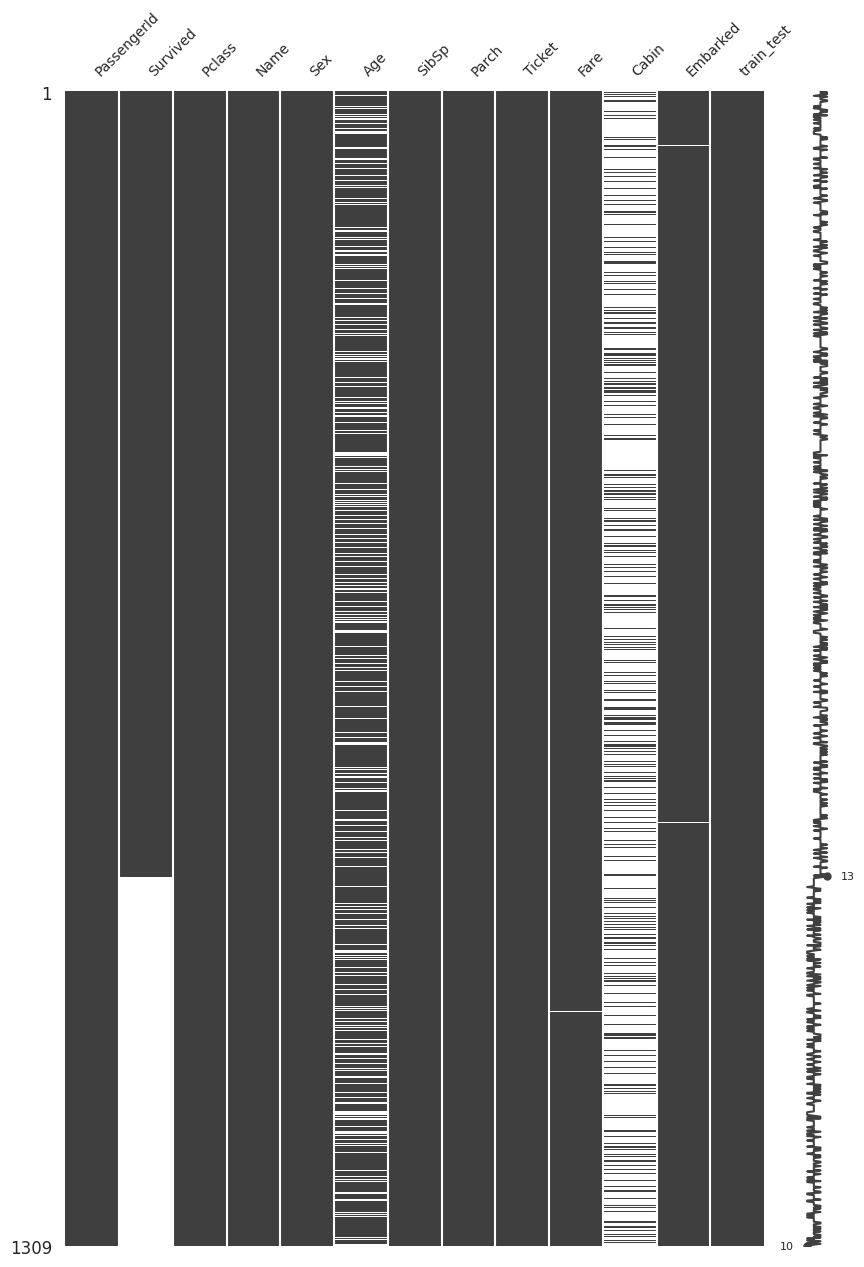

In [11]:
msno.matrix(complete_df, figsize=(10,15), fontsize = 10)

### Let's check whether sorting values can reveal distribution patterns in the missing values (ie, are they correlated), as this matrix are currently ordered by Passenger ID.

<Axes: >

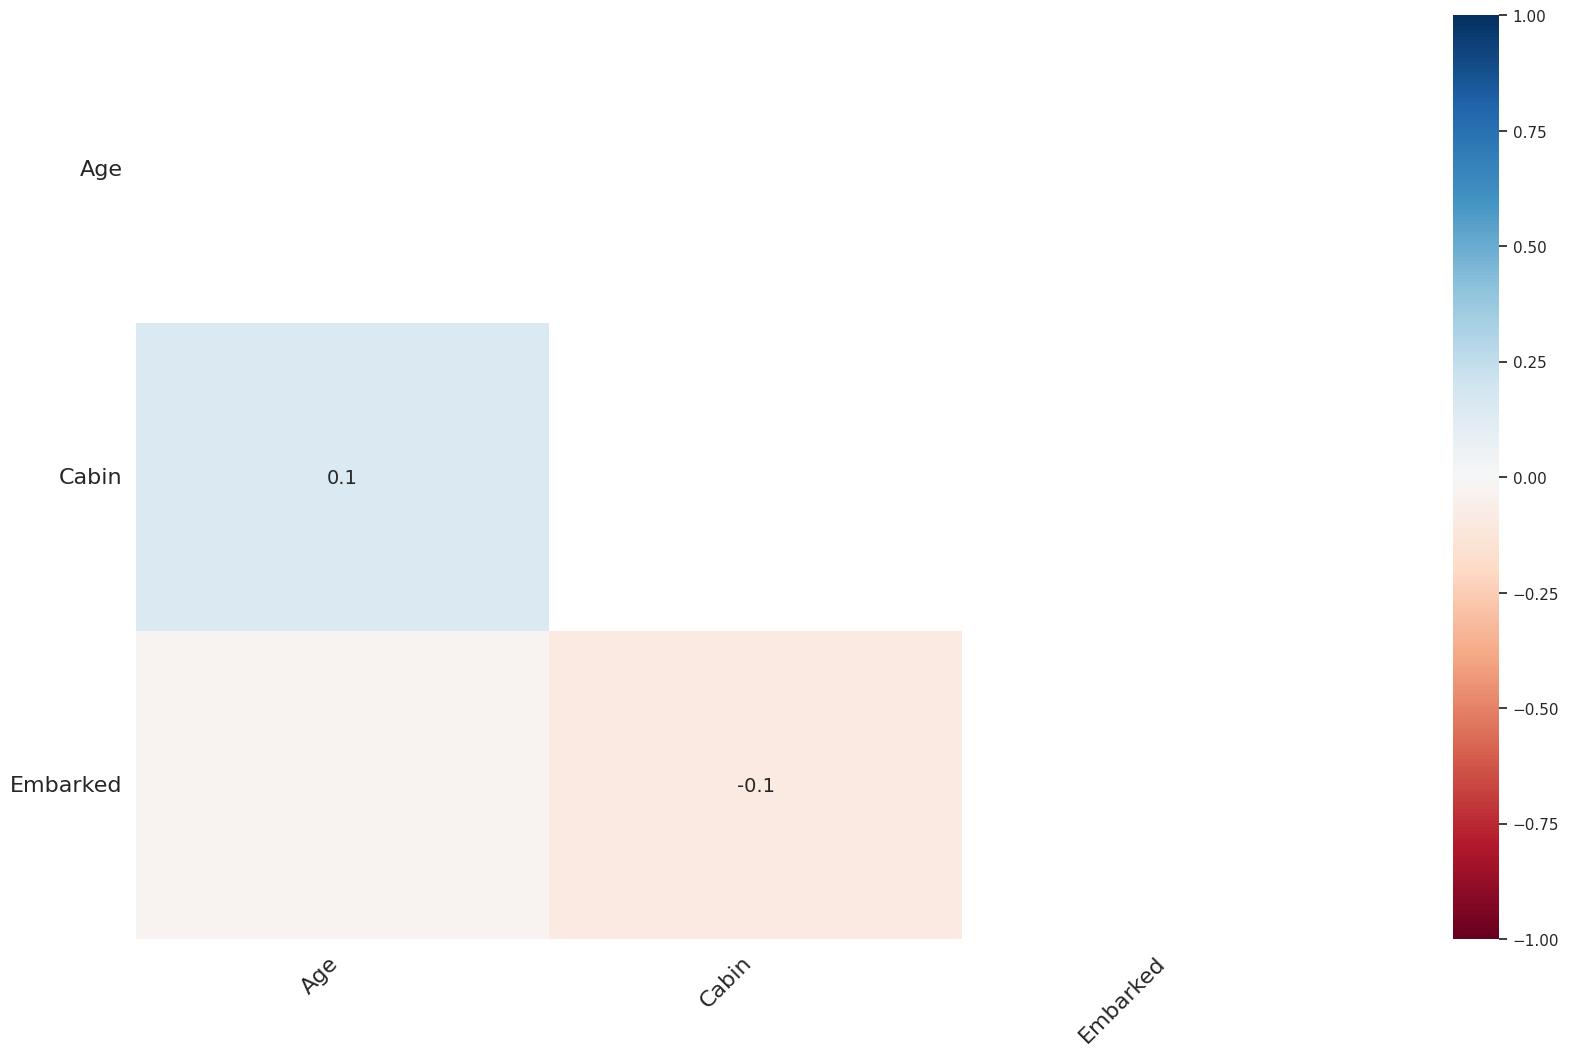

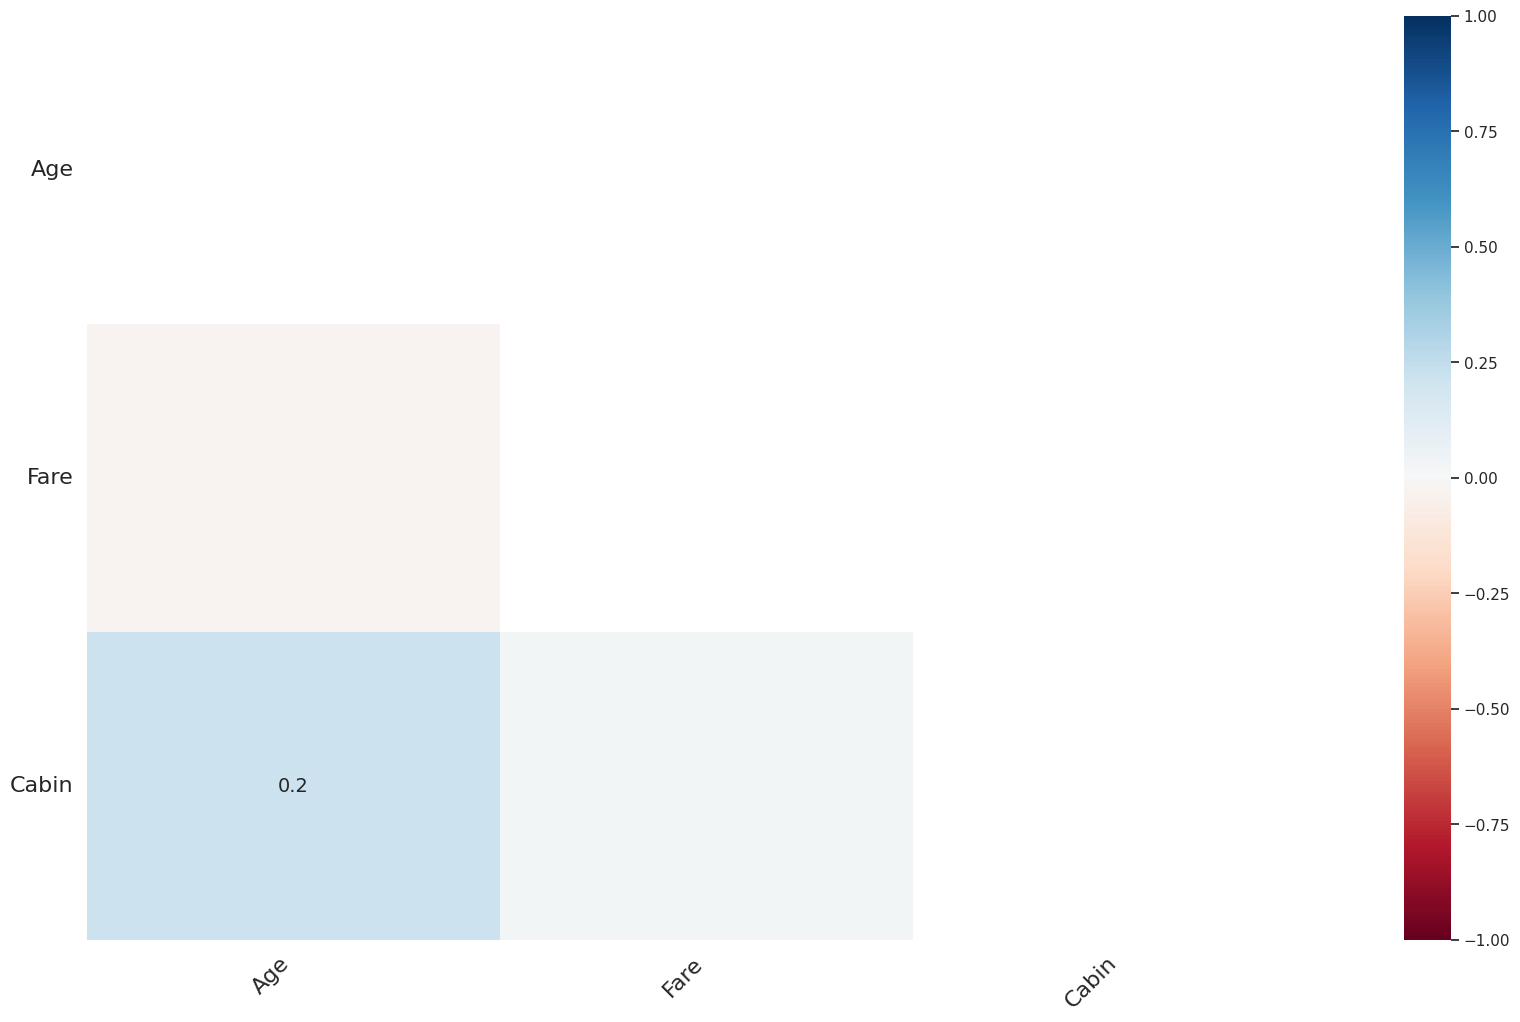

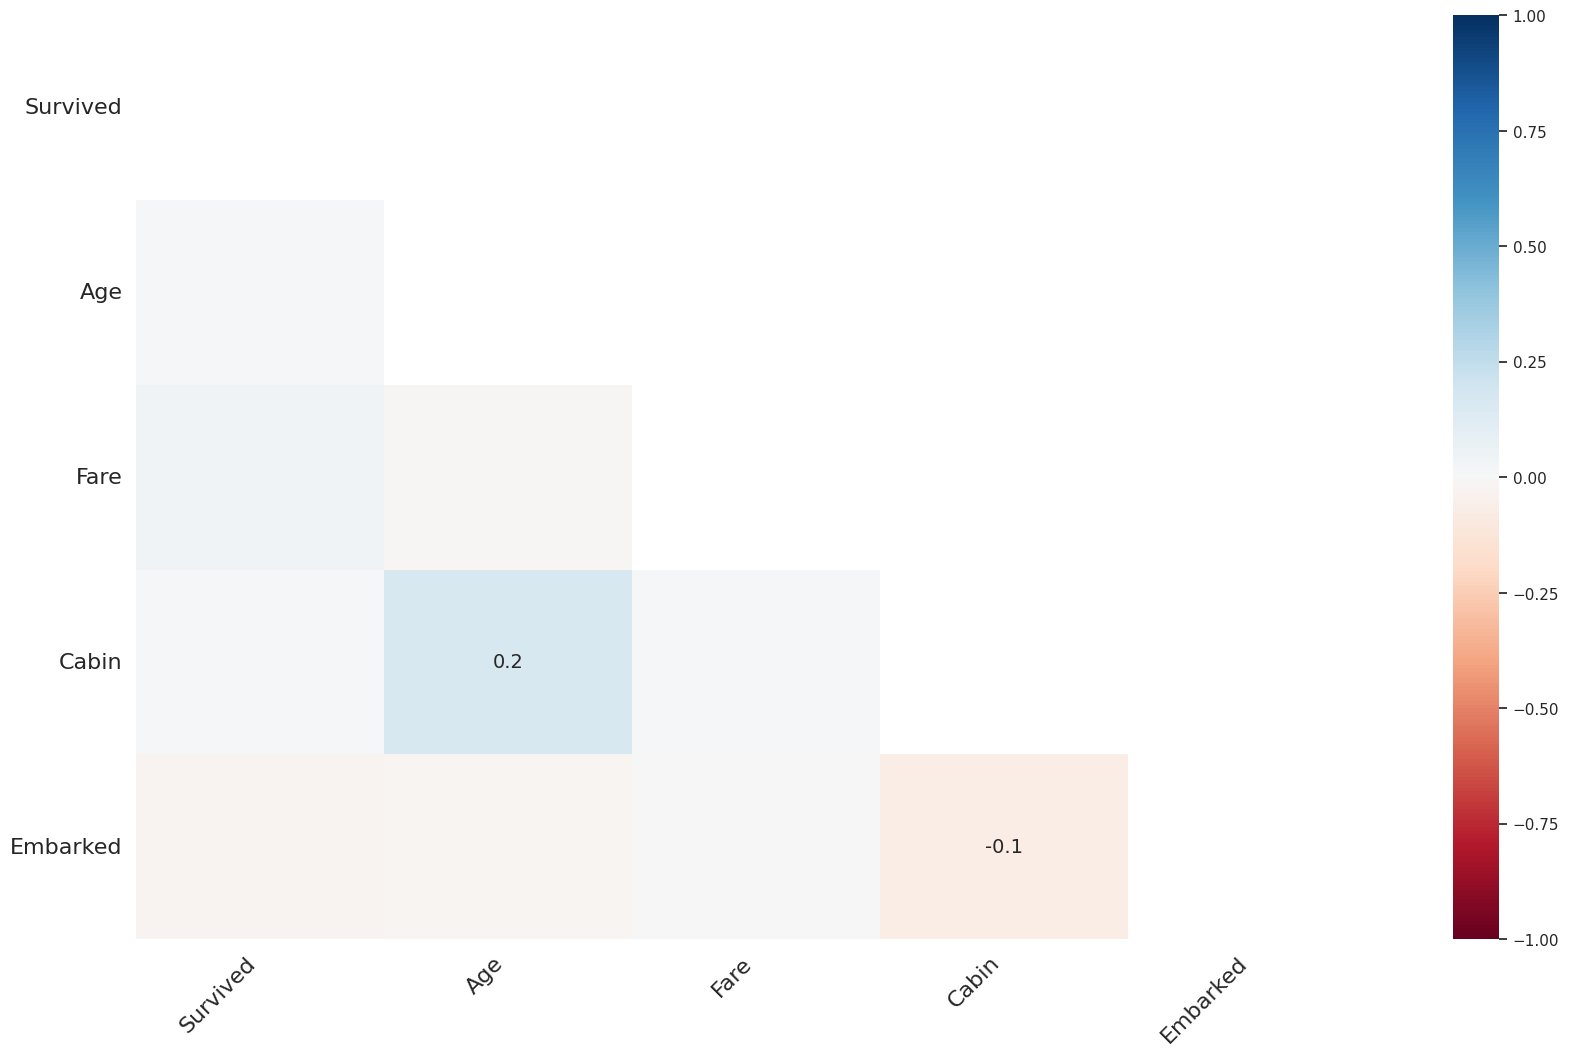

In [12]:
msno.heatmap(train_df)
msno.heatmap(test_df)
msno.heatmap(complete_df)

<div class="alert alert-block alert-info">
Based on the missingness analysis of our 3 variables of interest (Cabin, Age, and Embarked), ignoring our other 2 variables (Survived and Fare), Cabin and Age are very slightly associated in the test and train data, but Cabin and Embarked are very slightly negatively associated only in the test data. 
  <br> As there is no clear association between missing variables, the missing values do not appear to represent a bias in the data collection (random loss of data, no expected strong bias from data collection).
</div>

## Can the missing values be corrected by imputation?

## Age, Fare, Cabin, Embarked

#### Missing: Embarked = Manual Fix

In [13]:
complete_df[complete_df['Embarked'].isnull()]
print("Google search of these 2 passengers show they embarked in Southampton, so the null values for Embarked can be changed to S in complete and train dataframes.")
complete_df['Embarked'] = complete_df['Embarked'].fillna("S")
complete_df[complete_df['Embarked'].isnull()]

Google search of these 2 passengers show they embarked in Southampton, so the null values for Embarked can be changed to S in complete and train dataframes.


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test


In [14]:
train_df['Embarked'] = train_df['Embarked'].fillna("S")
train_df[train_df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test


#### **Embarked values have been resolved.**

***

#### Missing: Fare

In [15]:
complete_df.groupby(['Pclass'])["Fare"].agg(['mean', 'median', 'count'])

,mean,median,count
Pclass,,,
1,87.508992,60.0000,323
2,21.179196,15.0458,277
3,13.302889,8.0500,708


In [16]:
print("Overall median and mean misrepresent Class 3 tickets due to expensive Class 1 tickets. So Fare imputation methods should use Pclass3 data only for reliability as the missing ticket has Pclass = 3.")

Overall median and mean misrepresent Class 3 tickets due to expensive Class 1 tickets. So Fare imputation methods should use Pclass3 data only for reliability as the missing ticket has Pclass = 3.


In [17]:
print("Google search of this passenger revealed no new information, so we must impute.")
complete_df[complete_df['Fare'].isnull()]

Google search of this passenger revealed no new information, so we must impute.


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test
152,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,0


In [18]:
test_df[test_df['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,0


#### As only 1 Fare is missing from the test data set, the imputation is unlikely to affect the end result. However, for interest, let's compare the difference of manually inserting a value to a similar passenger vs. a ML algorithm for imputation.

In [19]:
print("All Pclass 3 tickets.")
def find_class(Pclass):
    return complete_df.loc[complete_df['Pclass'].eq(Pclass)]
find_class(3)['Fare']

All Pclass 3 tickets.


0       7.2500
2       7.9250
4       8.0500
5       8.4583
7      21.0750
        ...   
412     7.7750
413     8.0500
415     7.2500
416     8.0500
417    22.3583
Name: Fare, Length: 709, dtype: float64

In [20]:
print("709 total Class 3 tickets, so 708 total Class 3 fares.")
print("Let's narrow to the same demographic as PassID 1044 Thomas Storey.")
Fareguess = complete_df.loc[(complete_df["Pclass"]==3) & (complete_df["Sex"]== "male") & (complete_df["SibSp"] < 1) & (complete_df["Embarked"] == "S") & (complete_df["Age"] > 50)]
Fareguess

709 total Class 3 tickets, so 708 total Class 3 fares.
Let's narrow to the same demographic as PassID 1044 Thomas Storey.


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test
94,95,0.0,3,"Coxon, Mr. Daniel",male,59.0,0,0,364500,7.2500,NaN,S,1
152,153,0.0,3,"Meo, Mr. Alfonzo",male,55.5,0,0,A.5. 11206,8.0500,NaN,S,1
222,223,0.0,3,"Green, Mr. George Henry",male,51.0,0,0,21440,8.0500,NaN,S,1
326,327,0.0,3,"Nysveen, Mr. Johan Hansen",male,61.0,0,0,345364,6.2375,NaN,S,1
406,407,0.0,3,"Widegren, Mr. Carl/Charles Peter",male,51.0,0,0,347064,7.7500,NaN,S,1
631,632,0.0,3,"Lundahl, Mr. Johan Svensson",male,51.0,0,0,347743,7.0542,NaN,S,1
851,852,0.0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S,1
152,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,0


In [21]:
print(("The manually calculated median fare of similar tickets ="), Fareguess.Fare.median())

The manually calculated median fare of similar tickets = 7.75


Let's compare that with a suitable ML model. MICE could work, so let's try that.

In [22]:
print("Let's make a subset of Class 3 tickets to run ML algorithms on")
cl3 = complete_df.copy()
cl3 = cl3.loc[(complete_df["Pclass"]==3)]
cl3.describe()

Let's make a subset of Class 3 tickets to run ML algorithms on


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,train_test
count,709.000000,491.000000,709.0,501.000000,709.000000,709.000000,708.000000,709.000000
mean,640.558533,0.242363,3.0,24.816367,0.568406,0.400564,13.302889,0.692525
std,379.887782,0.428949,0.0,11.958202,1.299681,0.981639,11.494358,0.461774
min,1.000000,0.000000,3.0,0.170000,0.000000,0.000000,0.000000,0.000000
25%,302.000000,0.000000,3.0,18.000000,0.000000,0.000000,7.750000,0.000000
50%,644.000000,0.000000,3.0,24.000000,0.000000,0.000000,8.050000,1.000000
75%,971.000000,0.000000,3.0,32.000000,1.000000,0.000000,15.245800,1.000000
max,1309.000000,1.000000,3.0,74.000000,8.000000,9.000000,69.550000,1.000000


In [23]:
fare_mice = cl3.copy(deep=True)
mice_imputer = IterativeImputer()
fare_mice['Fare'] = mice_imputer.fit_transform(fare_mice[['Fare']])

micef_sample = fare_mice.loc[(fare_mice["Pclass"]==3) & (fare_mice["Sex"]== "male") & (fare_mice["SibSp"] < 1) & (fare_mice["Embarked"] == "S") & (fare_mice["Age"] > 50)]
micef_sample

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test
94,95,0.0,3,"Coxon, Mr. Daniel",male,59.0,0,0,364500,7.250000,NaN,S,1
152,153,0.0,3,"Meo, Mr. Alfonzo",male,55.5,0,0,A.5. 11206,8.050000,NaN,S,1
222,223,0.0,3,"Green, Mr. George Henry",male,51.0,0,0,21440,8.050000,NaN,S,1
326,327,0.0,3,"Nysveen, Mr. Johan Hansen",male,61.0,0,0,345364,6.237500,NaN,S,1
406,407,0.0,3,"Widegren, Mr. Carl/Charles Peter",male,51.0,0,0,347064,7.750000,NaN,S,1
631,632,0.0,3,"Lundahl, Mr. Johan Svensson",male,51.0,0,0,347743,7.054200,NaN,S,1
851,852,0.0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.775000,NaN,S,1
152,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,13.302889,NaN,S,0


In [24]:
fare_knn = cl3.copy(deep=True)
knn = KNNImputer(n_neighbors=10, weights="uniform", add_indicator=True)
fare_knn['Fare'] = knn.fit_transform(fare_knn[['Fare']])
knnf_sample = fare_knn.loc[(fare_knn["Pclass"]==3) & (fare_knn["Sex"]== "male") & (fare_knn["SibSp"] < 1) & (fare_knn["Embarked"] == "S") & (fare_knn["Age"] > 50)]
knnf_sample

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test
94,95,0.0,3,"Coxon, Mr. Daniel",male,59.0,0,0,364500,7.250000,NaN,S,1
152,153,0.0,3,"Meo, Mr. Alfonzo",male,55.5,0,0,A.5. 11206,8.050000,NaN,S,1
222,223,0.0,3,"Green, Mr. George Henry",male,51.0,0,0,21440,8.050000,NaN,S,1
326,327,0.0,3,"Nysveen, Mr. Johan Hansen",male,61.0,0,0,345364,6.237500,NaN,S,1
406,407,0.0,3,"Widegren, Mr. Carl/Charles Peter",male,51.0,0,0,347064,7.750000,NaN,S,1
631,632,0.0,3,"Lundahl, Mr. Johan Svensson",male,51.0,0,0,347743,7.054200,NaN,S,1
851,852,0.0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.775000,NaN,S,1
152,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,13.302889,NaN,S,0


<div class="alert alert-block alert-info">

 For the missing Fare of Thomas Storey, MICE and KNN have both predicted 33.295479 when trained on the complete set, or 13.302889 when trained on the complete set of Class 3 tickets. <br> These are the respective means for these datasets, showing that ML for imputation with the code shown here does no more than impute the overall mean when there is only one value missing!! <br> We therefore will do better by taking the manual approach, which seems closer to the patterns in the data, by choosing the median fare for Pclass=3. <br>

 Let's make Thomas have a fare of 7.75.
    </div>

In [25]:
Thom_fare = Fareguess.Fare.median() #earlier value for 7.75
complete_df["Fare"] = complete_df["Fare"].fillna(Thom_fare)
test_df["Fare"] = test_df["Fare"].fillna(Thom_fare)
complete_df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
train_test        0
dtype: int64

In [26]:
test_df.loc[test_df['PassengerId'] == 1044]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,7.75,NaN,S,0


In [27]:
complete_df.loc[complete_df['PassengerId'] == 1044]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test
152,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,7.75,NaN,S,0


#### **All Fares have now been resolved in the test and complete dataframe.**

***

### Missing values — Cabin

The difficulty with Cabin values is that so many are missing, the dataset might not be suitable for an algorithm.<br>
However, we can nullify the effect of missing values by grouping them into one class, and then fix what missing values we can. <br>
So long as we can correct some of the missing Cabin values for missing passenger IDs, this approach could increase score for those missing passenger IDs.<br>
Cabin numbers are not obviously meaningful, but Cabin deck numbers (the letter) may be related to survival.

In [28]:
complete_df.groupby(['Cabin'])["Fare"].agg(['mean', 'median', 'count']).sort_values(['count'],ascending=False)

,mean,median,count
Cabin,,,
C23 C25 C27,263.0000,263.0000,6
G6,14.2050,16.7000,5
B57 B59 B63 B66,262.3750,262.3750,5
B96 B98,120.0000,120.0000,4
F4,39.0000,39.0000,4
...,...,...,...
B82 B84,79.2000,79.2000,1
B80,146.5208,146.5208,1
B79,86.5000,86.5000,1


Cabin number is not a reliable indicator of fare (B79 vs B80). So unfortunately we can't fill in the data from guessing from adjacent cabins. <br>
But can we figure out Cabin fare by comparing cabin rows, and looking at the position on the ship?

In [29]:
knowncabs = complete_df.copy()
knowncabs.dropna(subset=["Cabin"],how="any",inplace=True)
knowncabs

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
6,7,0.0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1
10,11,1.0,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,1
11,12,1.0,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
404,1296,NaN,1,"Frauenthal, Mr. Isaac Gerald",male,43.0,1,0,17765,27.7208,D40,C,0
405,1297,NaN,2,"Nourney, Mr. Alfred (Baron von Drachstedt"")""",male,20.0,0,0,SC/PARIS 2166,13.8625,D38,C,0
407,1299,NaN,1,"Widener, Mr. George Dunton",male,50.0,1,1,113503,211.5000,C80,C,0
411,1303,NaN,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,19928,90.0000,C78,Q,0


In [30]:
knowncabs['Deck'] = knowncabs["Cabin"].apply(lambda s: s[0] if pd.notnull(s) else 'M') #M not present here as knowncabs analysis, we will use this later when imputing the main dataframes.
knowncabs.groupby(['Deck'])["Fare"].agg(['mean', 'median', 'count']).sort_values(['count'],ascending=False)

,mean,median,count
Deck,,,
C,107.926598,86.2896,94
B,122.383078,82.2667,65
D,53.007339,52.5542,46
E,54.564634,53.1000,41
A,41.244314,35.0771,22
F,18.079367,13.0000,21
G,14.205000,16.7000,5
T,35.500000,35.5000,1


Cabin Fare is associated with Cabin deck number in the known Cabin numbers.

In [31]:
knowncabs.groupby(['Deck'])["Survived"].agg(['mean', 'median', 'count']).sort_values(['count'],ascending=False)

,mean,median,count
Deck,,,
C,0.593220,1.0,59
B,0.744681,1.0,47
D,0.757576,1.0,33
E,0.750000,1.0,32
A,0.466667,0.0,15
F,0.615385,1.0,13
G,0.500000,0.5,4
T,0.000000,0.0,1


Survival varies across deck. <br>
Approach used is to group Deck numbers, but group all missing values as M, to retain it as a weak variable for known cabin numbers. <br>

#### Now let's investigate whether we can fix any missing Cabin values in train_df.


Ideas:
- Can we fix M Deck values for those with Parch or SibSp >1, then comparing Surnames and Embarked? (Theory: Family members buy and embark together).
- Can we fix M Deck values by matching Fare, with Age and Embarked as guidance? (Similar deck have similar price)

In [32]:
train_df['Deck'] = train_df["Cabin"].apply(lambda s: s[0] if pd.notnull(s) else 'M')
complete_df['Deck'] = complete_df["Cabin"].apply(lambda s: s[0] if pd.notnull(s) else 'M')
test_df['Deck'] = test_df["Cabin"].apply(lambda s: s[0] if pd.notnull(s) else 'M')


train_df.groupby(['Deck'])["Fare"].agg(['mean', 'median', 'max', 'min', 'count']).sort_values(['count'],ascending=False)

,mean,median,max,min,count
Deck,,,,,
M,19.157325,10.50000,512.3292,0.0000,687
C,100.151341,83.47500,263.0000,26.5500,59
B,113.505764,80.00000,512.3292,0.0000,47
D,57.244576,53.10000,113.2750,12.8750,33
E,46.026694,45.18125,134.5000,8.0500,32
A,39.623887,35.50000,81.8583,0.0000,15
F,18.696792,13.00000,39.0000,7.6500,13
G,13.581250,13.58125,16.7000,10.4625,4
T,35.500000,35.50000,35.5000,35.5000,1


In [33]:
train_df['Surname'] = train_df['Name'].str.split(",").str[0]
complete_df['Surname'] = complete_df['Name'].str.split(",").str[0]
test_df['Surname'] = test_df['Name'].str.split(",").str[0]
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test,Deck,Surname
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S,1,M,Montvila
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S,1,B,Graham
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S,1,M,Johnston
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C,1,C,Behr
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q,1,M,Dooley


In [34]:
trainmissingonly = list(set(train_df["Surname"].loc[train_df['Deck'] == "M"]) - set(train_df["Surname"].loc[train_df['Deck'] != "M"]))
trainmissingmix = list(set(train_df["Surname"].loc[train_df['Deck'] == "M"]) - set(trainmissingonly))
trainmissingmix

['Flynn',
 'Carter',
 'Wick',
 'Webber',
 'Keane',
 'Harper',
 'Peter',
 'Hoyt',
 'Smith',
 'Daly',
 'Brown',
 'Harris',
 'Carlsson',
 'Allen']

#### Now manually to look through these test_df surnames to see if any missing Cabins can be fixed based on data within train data. Only 2 could be fixed manually using only test data (Peter and Wick).

In [35]:
train_df.loc[train_df["Surname"] == "Peter"]
train_df.loc[train_df["Surname"] == "Wick"]
train_df.loc[train_df["Surname"] == "Wick", "Deck"] = "C"
train_df.loc[train_df["Surname"] == "Peter", "Deck"] = "F"

In [36]:
completemissingonly = list(set(complete_df["Surname"].loc[complete_df['Deck'] == "M"]) - set(complete_df["Surname"].loc[complete_df['Deck'] != "M"]))
completemissingmix = list(set(complete_df["Surname"].loc[complete_df['Deck'] == "M"]) - set(completemissingonly))
completemissingmix
# No more could be solved by looking at surnames in the complete set (for the test or train data).

['Franklin',
 'Carter',
 'Wick',
 'Hoyt',
 'Daly',
 'Harris',
 'Burns',
 'Abelseth',
 'Webber',
 'Keane',
 'Carlsson',
 'Allen',
 'Flynn',
 'Frauenthal',
 'Smith',
 'McCarthy',
 'Cook',
 'Peter',
 'Harper',
 'Warren',
 'Brown']

In [37]:
train_df.loc[train_df['Deck'] == "M"]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test,Deck,Surname
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,M,Braund
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,M,Heikkinen
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,M,Allen
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,1,M,Moran
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,1,M,Palsson
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S,1,M,Sutehall
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q,1,M,Rice
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1,M,Montvila
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,1,M,Johnston


### Can we guess Cabin values, based on Fare values in the complete_df? <br> We can make a separate train_df set to run our comparison with to see if these guesses will help. We will only look at the most popular duplicate Fares, to save time.

In [38]:
cabtrain_df = train_df.copy()
pd.set_option("display.max_rows", 10)
cabtrain_df["Fare"].value_counts()

Fare
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: count, Length: 248, dtype: int64

In [39]:
cabtrain_df.loc[cabtrain_df['Fare'] == 8.0500, "Deck"] = "E"
cabtrain_df.loc[cabtrain_df['Fare'] == 7.8958, "Deck"] = "C"
#These were the only two that could had only one Deck listed other than M values, in the top 10 duplicate Fare M or other entries. No other guesses made.
cabtrain_df.loc[cabtrain_df['Fare'] == 8.0500]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test,Deck,Surname
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,NaN,S,1,E,Allen
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.05,NaN,S,1,E,Saundercock
37,38,0,3,"Cann, Mr. Ernest Charles",male,21.0,0,0,A./5. 2152,8.05,NaN,S,1,E,Cann
45,46,0,3,"Rogers, Mr. William John",male,NaN,0,0,S.C./A.4. 23567,8.05,NaN,S,1,E,Rogers
77,78,0,3,"Moutal, Mr. Rahamin Haim",male,NaN,0,0,374746,8.05,NaN,S,1,E,Moutal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
676,677,0,3,"Sawyer, Mr. Frederick Charles",male,24.5,0,0,342826,8.05,NaN,S,1,E,Sawyer
696,697,0,3,"Kelly, Mr. James",male,44.0,0,0,363592,8.05,NaN,S,1,E,Kelly
758,759,0,3,"Theobald, Mr. Thomas Leonard",male,34.0,0,0,363294,8.05,NaN,S,1,E,Theobald
814,815,0,3,"Tomlin, Mr. Ernest Portage",male,30.5,0,0,364499,8.05,NaN,S,1,E,Tomlin


### 79/687 Deck values in cabtrain_df data fixed from Missing to a Deck by Fare analysis. Okay, let's end there for now, and let Deck guide future analysis if helpful.

***

### AGE Imputation

In [40]:
train_df['Title'], test_df['Title'], cabtrain_df['Title'], complete_df["Title"] = [df.Name.str.extract \
        (' ([A-Za-z]+)\.', expand=False) for df in [train_df, test_df, cabtrain_df, complete_df]]

In [41]:
[df['Age'].fillna(df.groupby(['Pclass','Sex','Title'])['Age'].transform('mean'), inplace=True) for df in [train_df, test_df, cabtrain_df]]

/tmp/ipykernel_18/2796501493.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  [df['Age'].fillna(df.groupby(['Pclass','Sex','Title'])['Age'].transform('mean'), inplace=True) for df in [train_df, test_df, cabtrain_df]]
/tmp/ipykernel_18/2796501493.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always b

[None, None, None]

Imputed mean age value for missing age values based on Pclass, Sex and Title. Basic approach, this may be better done with ML.

In [42]:
print("3. Assign data categories to allow for correlation analysis")
df_num = train_df[['Age','SibSp','Parch','Fare']]
df_cat = train_df[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']]

3. Assign data categories to allow for correlation analysis


In [43]:
print("4. Group analysis of numerical data")


4. Group analysis of numerical data


In [44]:
pd.set_option("display.max_rows", 20)
train_df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
train_test       0
Deck             0
Surname          0
Title            0
dtype: int64

In [45]:
from sklearn.ensemble import RandomForestClassifier

y = train_df["Survived"]

all_dummies = pd.get_dummies(complete_df[['Pclass', 'Deck', 'Sex','SibSp', 'Parch', 'train_test']])

X = all_dummies[all_dummies.train_test == 1].drop(['train_test'], axis =1)
X_test = all_dummies[all_dummies.train_test == 0].drop(['train_test'], axis =1)


#features = ["SibSp", "Sex", "Fare", "Pclass"]
#X = pd.get_dummies(train_df[features])
#X_test = pd.get_dummies(test_df[features])

model = RandomForestClassifier(n_estimators=2000, max_depth=5, random_state=42)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_df.PassengerId, 'Survived': predictions})
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [46]:
accuracy_score(y, model.predict(X))

0.8215488215488216

In [47]:
# create the grid
n_estimators = [10, 100, 1000, 2000]
max_depth = [None, 5, 10, 20]
param_grid = dict(n_estimators=n_estimators, max_depth=max_depth)


# create the default model
rf = RandomForestClassifier(random_state=42)

# search the grid
grid = GridSearchCV(estimator=rf, 
                    param_grid=param_grid,
                    cv=3,
                    verbose=2,
                    n_jobs=-1)

grid_result = grid.fit(X, y)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


In [48]:
grid_result.best_params_

{'max_depth': 5, 'n_estimators': 2000}

In [49]:
grid_result.best_estimator_

RandomForestClassifier(max_depth=5, n_estimators=2000, random_state=42)

In [50]:
'''
from sklearn.ensemble import RandomForestClassifier

y = train_data["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")
'''

'\nfrom sklearn.ensemble import RandomForestClassifier\n\ny = train_data["Survived"]\n\nfeatures = ["Pclass", "Sex", "SibSp", "Parch"]\nX = pd.get_dummies(train_data[features])\nX_test = pd.get_dummies(test_data[features])\n\nmodel = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)\nmodel.fit(X, y)\npredictions = model.predict(X_test)\n\noutput = pd.DataFrame({\'PassengerId\': test_data.PassengerId, \'Survived\': predictions})\noutput.to_csv(\'submission.csv\', index=False)\nprint("Your submission was successfully saved!")\n'

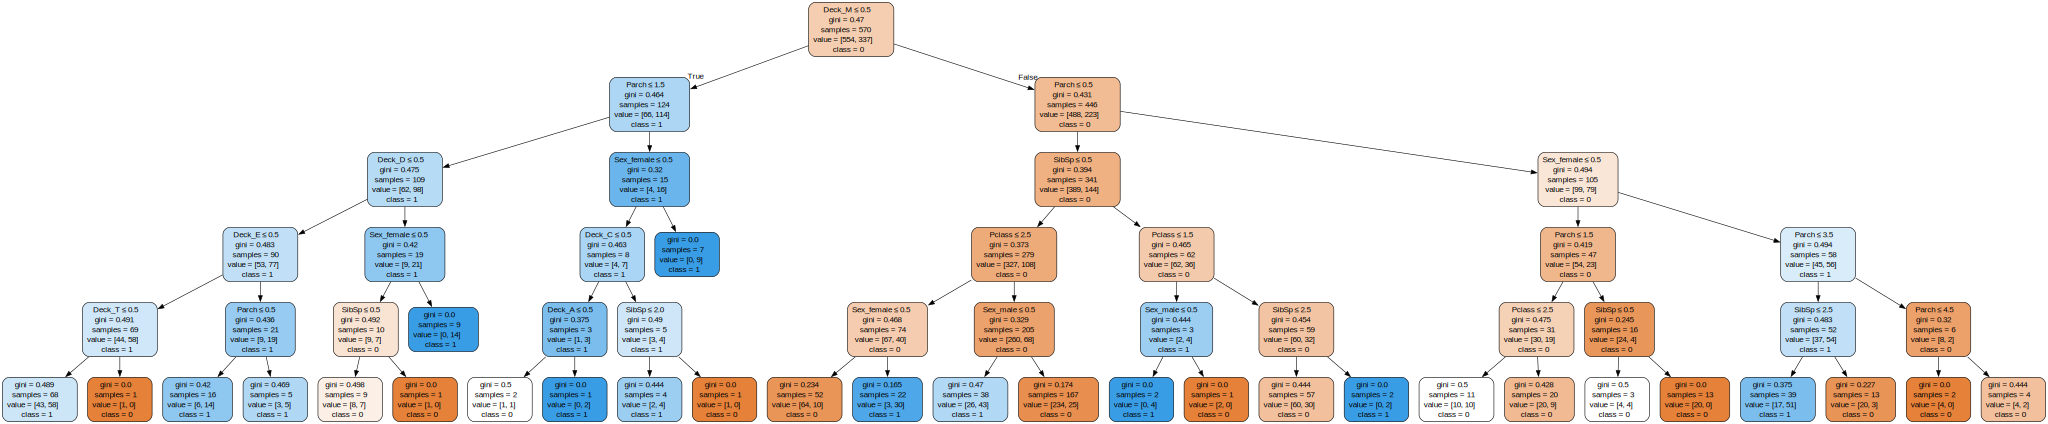

In [51]:
import graphviz  
from sklearn.tree import export_graphviz  
dot_data= export_graphviz(model.estimators_[10], out_file = None, 
                    feature_names = X.columns,  
                      class_names = ['0', '1'],  
                      filled = True, rounded = True,  
                      special_characters = True, impurity = True)  
graph = graphviz.Source(dot_data, format='png')  
graph  